In [119]:
# Load neccessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Load dataset

In [88]:
auto_train = pd.read_csv("C:/Users/Hp/Desktop/MSC 550/auto_policies_2020.csv")
auto_test = pd.read_csv("C:/Users/Hp/Desktop/MSC 550/auto_potential_customers_2022.csv")

In [89]:
auto_train.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
dtype: int64

In [90]:
auto_test.isnull().sum()

quote_number       0
gender             0
agecat           632
date_of_birth      0
credit_score     355
area               0
traffic_index    449
veh_age            0
veh_body           0
veh_value          0
dtype: int64

In [91]:
#drop columns that are not in the test dataset 
#since the information cannot be obtained unless the customers acquire an insurance policy
# pol_number and quote_number cannot be compared hence drop
auto_train = auto_train.drop(['pol_number','pol_eff_dt', 'claim_office', 'annual_premium'], axis = 1)
auto_test = auto_test.drop(['quote_number'], axis = 1)

In [92]:
# define agecat creteria
auto_train.loc[auto_train['agecat'] == 1]
auto_train.loc[auto_train['agecat'] == 2]
auto_train.loc[auto_train['agecat'] == 3]
auto_train.loc[auto_train['agecat'] == 4]
auto_train.loc[auto_train['agecat'] == 5]
auto_train.loc[auto_train['agecat'] == 6]

# Formating the date column to be a readable data in python using .to_datetime() function
auto_train['date_of_birth']= pd.to_datetime(auto_train['date_of_birth'])
auto_test['date_of_birth']= pd.to_datetime(auto_test['date_of_birth'])

# Created columns based on column using date time package.
auto_train['year']= auto_train['date_of_birth'].dt.year
auto_test['year']= auto_test['date_of_birth'].dt.year

In [93]:
# Binned values for training data
binned_values = []

# Creating the bins using an if-else statement
for value in auto_train['year']:
    if value <= 1949:
        new_agecat = "6"
    elif value > 1949 and value <= 1959:
        new_agecat = "5"
    elif value > 1959 and value <= 1969:
        new_agecat = "4"
    elif value > 1969 and value <= 1979:
        new_agecat = "3"
    elif value > 1979 and value <= 1989:
        new_agecat = "2"
    else:
        new_agecat = "1"
    binned_values.append(new_agecat)
auto_train['new_cat'] = binned_values

# Binned values for test data
binned_values = []

# Creating the bins using an if-else statement
for value in auto_test['year']:
    if value <= 1949:
        new_agecat = "6"
    elif value > 1949 and value <= 1959:
        new_agecat = "5"
    elif value > 1959 and value <= 1969:
        new_agecat = "4"
    elif value > 1969 and value <= 1979:
        new_agecat = "3"
    elif value > 1979 and value <= 1989:
        new_agecat = "2"
    else:
        new_agecat = "1"
    binned_values.append(new_agecat)
auto_test['new_cat'] = binned_values

In [94]:
auto_train = auto_train.drop(['agecat', 'date_of_birth', 'year'], axis = 1)
auto_test = auto_test.drop(['agecat', 'date_of_birth', 'year'], axis = 1)

le = preprocessing.LabelEncoder()
auto_train['area'] = le.fit_transform(auto_train['area'])
auto_train['veh_body'] = le.fit_transform(auto_train['veh_body'])
auto_train['gender'] = le.fit_transform(auto_train['gender'])
                                          
auto_test['area'] = le.fit_transform(auto_test['area'])
auto_test['veh_body'] = le.fit_transform(auto_test['veh_body'])
auto_test['gender'] = le.fit_transform(auto_test['gender'])

# Fill only the Pclass column using a backfill
auto_train['traffic_index'] = auto_train['traffic_index'].fillna(method="bfill")
auto_test['traffic_index'] = auto_test['traffic_index'].fillna(method="bfill")

# Fill only the Pclass column using the mean of the Age column
auto_train['credit_score'] = auto_train['credit_score'].fillna(auto_train['credit_score'].mean())
auto_test['credit_score'] = auto_test['credit_score'].fillna(auto_test['credit_score'].mean())

34316
26076


<function matplotlib.pyplot.show(close=None, block=None)>

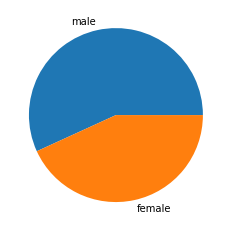

In [105]:
## GENDER VISUALIZATION
male = (auto_train['gender'].values == 0).sum()
print(y)
female = (auto_train['gender'].values == 1).sum()
print(x)
gender = ['male', 'female']
z = np.array([34316, 26076])
plt.pie(z, labels = gender)
plt.show

## VISUALIZATION OF IMBALANCED NUMCLAIMS COLUMN

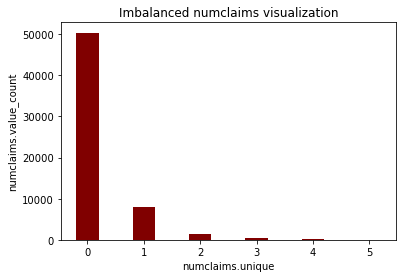

In [9]:
numclaims_unique = auto_train['numclaims'].unique() #define x axis
numclaims_values =auto_train['numclaims'].value_counts() # define y axis

plt.bar(numclaims_unique , numclaims_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("numclaims.unique")
plt.ylabel("numclaims.value_count")
plt.title("Imbalanced numclaims visualization")
plt.show()

## 1a) Predicting number of claims on the original dataset

In [10]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y1 = auto_train.numclaims

# Using KNN Classifier - Cross validation

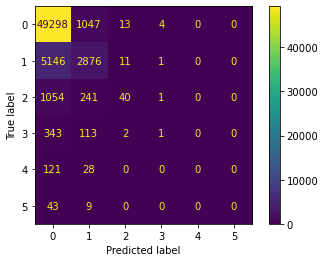

In [11]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_scaled = scaler.fit_transform(x)

knn = KNeighborsClassifier(n_neighbors = 5) # choose algorithm to use
knn.fit(x_scaled, y1) # fit the algorithim in the dataset
predictions = knn.predict(x_scaled) # use x to predict y after fitting the data

labels = list(y1.unique()) # labels for confusion matrix
cm = confusion_matrix(y1, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [12]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
print(accuracy_score(y1, predictions))
print(f1_score(predictions, y1, average = 'weighted'), "f1_score")

0.8646012716916148
0.892944900987691 f1_score


In [13]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) #prepare cross validation procedure
scores = cross_val_score(knn, x_scaled, y1, scoring='accuracy', cv=cv) # get the scores
np.mean(scores)

0.834183562911714

# Using KNN Classifier - Independent test set

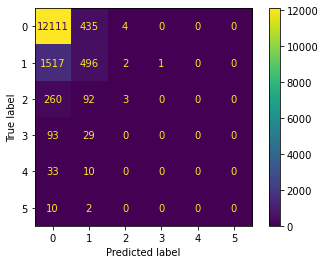

In [14]:
# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y1, test_size = .25, random_state = 4)

knn = KNeighborsClassifier(n_neighbors = 5) # choose algorithm to use
knn.fit(x_train, y_train) # fit the algorithim in the dataset
predictions = knn.predict(x_test) # use x to predict y after fitting the data

labels = list(y_test.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [15]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
print(accuracy_score(y_test, predictions))
print(f1_score(predictions, y_test, average = 'weighted'), "f1_score")

0.8352099615843158
0.8693607885965255 f1_score


# Decision tree classifier - Cross Validation

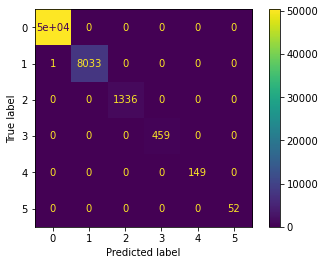

In [16]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y1 = auto_train.numclaims

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x, y1)
y_pred = dt_clf.predict(x)

labels = list(y_test.unique())
cm = confusion_matrix(y1, y_pred)
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [17]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
print(accuracy_score(y1, y_pred))
print(f1_score(y_pred, y1, average = 'weighted'), "f1_score")

0.9999834415154325
0.999983441948531 f1_score


In [18]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(dt_clf, x, y1, scoring='accuracy', cv=cv)
np.mean(scores)

0.7546363756788979

# Decision tree classifier - Independent Test Set

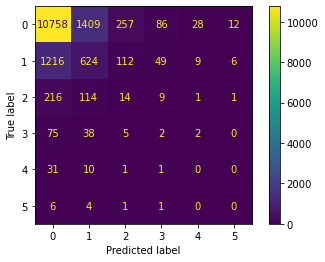

In [19]:
# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = .25, random_state = 4)

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)

labels = list(y_test.unique())
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [20]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
print(accuracy_score(y_test, y_pred))
print(f1_score(y_pred, y_test, average = 'weighted'), "f1_score")

0.7549344284011127
0.7496746075404699 f1_score


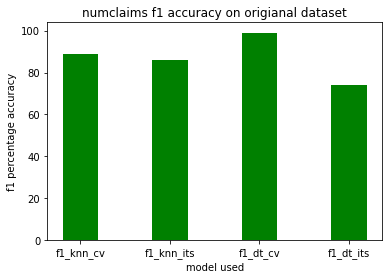

In [21]:
f1_model = ['f1_knn_cv', 'f1_knn_its', 'f1_dt_cv', 'f1_dt_its'] #define x axis
f1_values = [89, 86, 99, 74] # define y axis

plt.bar(f1_model , f1_values, color ='green',
        width = 0.4)
 
plt.xlabel("model used")
plt.ylabel("f1 percentage accuracy")
plt.title("numclaims f1 accuracy on origianal dataset")
plt.show()

## Notes

## 1b) Predicting claim cost on the original dataset

In [22]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y2 = auto_train.claimcst0

## KNN Regressor- Cross Validation

In [23]:
# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_scaled = scaler.fit_transform(x)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_scaled, y2)
predictions = knn.predict(x)

#metric
mae_knn_cv = mean_absolute_error(predictions, y2)
mae_knn_cv

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


666.3320361164173

In [24]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(knn, x_scaled, y2, scoring='neg_mean_absolute_error', cv=cv)
np.mean(scores)

-767.0395756163828

## KNN Regressor- Independent Test Set

In [25]:
# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y2, test_size = .25, random_state = 4)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

#metric
mae_knn_its = mean_absolute_error(predictions, y_test)
mae_knn_its

781.8757220764791

## Decision Tree Regressor- Cross Validation

In [26]:
dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(x, y2)
y_pred = dt_reg.predict(x)

#metric
mae_dt_cv = mean_absolute_error(y_pred, y2)
mae_dt_cv

0.008701213728639554

In [27]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dt_reg, x, y2, scoring='neg_mean_absolute_error', cv=cv)
np.mean(scores)

-966.6504313777554

## Decision Tree Regressor- Independent Test Set

In [28]:
# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = .25, random_state = 4)

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(x_train, y_train)
y_pred = dt_reg.predict(x_test)

#metric
mae_dt_its = mean_absolute_error(y_pred, y_test)
mae_dt_its

984.528041219153

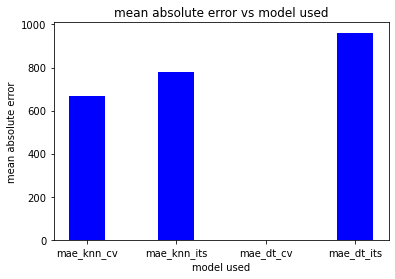

In [29]:
mae_name = ['mae_knn_cv', 'mae_knn_its', 'mae_dt_cv', 'mae_dt_its'] #define x axis
mae_values = [666, 781, 0.008, 961] # define y axis

plt.bar(mae_name , mae_values, color ='blue',
        width = 0.4)
 
plt.xlabel("model used")
plt.ylabel("mean absolute error")
plt.title("mean absolute error vs model used")
plt.show()

## Notes

## Add Features

In [30]:
auto_train['credit_score'].describe()

count    60392.000000
mean       662.193190
std        133.248261
min        301.000000
25%        606.000000
50%        674.000000
75%        767.000000
max        850.000000
Name: credit_score, dtype: float64

In [31]:
auto_train_df = auto_train

In [32]:
# Binned values for training data
binned_values = []

# Creating the bins using an if-else statement
for value in auto_train_df['credit_score']:
    if value <= 606:
        credit_score_cat = "1"
    elif value > 606 and value <= 674:
        credit_score_cat = "2"
    elif value > 674 and value <= 767:
        credit_score_cat = "3"
    else:
        credit_score_cat = "4"
    binned_values.append(credit_score_cat)
auto_train_df['credit_score_cat'] = binned_values

## 2a) Predicting number of claims on the added features dataset

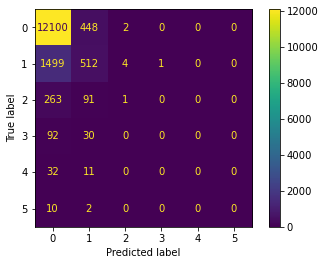

In [33]:
#Define x and y, training and test datasets
x = auto_train_df.drop(['numclaims', 'claimcst0'], axis = 1)
y1 = auto_train_df.numclaims

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_scaled = scaler.fit_transform(x)

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y1, test_size = .25, random_state = 4)

knn = KNeighborsClassifier(n_neighbors = 5) # choose algorithm to use
knn.fit(x_train, y_train) # fit the algorithim in the dataset
predictions = knn.predict(x_test) # use x to predict y after fitting the data

labels = list(y_test.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [34]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
f1_score(predictions, y_test, average = 'weighted'), "f1_score"

(0.8689465198309262, 'f1_score')

## 2b) Predicting claim cost on the added features dataset

In [35]:
#Define x and y, training and test datasets
x = auto_train_df.drop(['numclaims', 'claimcst0'], axis = 1)
y2 = auto_train_df.claimcst0

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_scaled = scaler.fit_transform(x)

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y2, test_size = .25, random_state = 4)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

#metric
mean_absolute_error(predictions, y_test)

787.1963173078761

## Feature Selection - filter method -Using a statistical (chi-squared) test

In [36]:
auto_train = auto_train.drop(['credit_score_cat'], axis = 1)

## 3a) Predicting number of claims on feature selection

In [37]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y1 = auto_train.numclaims

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_scaled = scaler.fit_transform(x)

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y1, test_size = .25, random_state = 4)
# Using a statistical (chi-squared) test
# Defining to select the best k features using chi-squared
selector = SelectKBest(chi2, k = 5)

# Creating new dataset with selected features
x_new = selector.fit_transform(x_train, y_train)

# Apply transformation to the test set
x_test_new = selector.transform(x_test)

knn = KNeighborsClassifier(n_neighbors = 5) # choose algorithm to use
knn.fit(x_new, y_train) # fit the algorithim in the dataset
predictions = knn.predict(x_test_new) # use x to predict y after fitting the data

# Computing accuracy score i.e. total correct predictions divided by total number of observations
f1_score(predictions, y_test, average = 'weighted'), "f1_score"

(0.8646132082945273, 'f1_score')

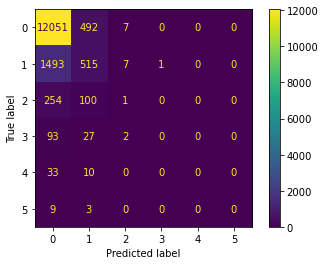

In [38]:
labels = list(y_test.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

## PCA Regression

In [39]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y2 = auto_train.claimcst0

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = .25, random_state = 4)

# Scale the data since PCA is distance based
x_trained_scaled = StandardScaler().fit_transform(x_train)

# Define PCA with 3 principal components
pca = PCA(n_components=3)
# get new X_train dataset that is transformed via its principal components
x_train_principalComponents = pca.fit_transform(x_trained_scaled)
# convert PCA datasets into a dataframe instead of an array with little structure
df_x_train_PC = pd.DataFrame(data = x_train_principalComponents,
                             columns = ['pc1', 'pc2', 'pc3'])

# Do the same thing to the test dataset.
x_test_scaled = StandardScaler().fit_transform(x_test)
x_test_principalComponents = pca.fit_transform(x_test_scaled)
df_x_test_PC = pd.DataFrame(data = x_test_principalComponents,
                             columns = ['pc1', 'pc2', 'pc3'])

knn = KNeighborsRegressor(n_neighbors = 5) # choose algorithm to use
knn.fit(df_x_train_PC , y_train) # fit the algorithim in the dataset
predictions = knn.predict(df_x_test_PC) # use x to predict y after fitting the data

#metric
mean_absolute_error(predictions, y_test)

1020.7035719700235

## 4) Predicting numclaims on balanced dataset

## Undersampling

In [40]:
auto_train['numclaims'].value_counts()

0    50362
1     8034
2     1336
3      459
4      149
5       52
Name: numclaims, dtype: int64

In [41]:
#Define x and y, training and test datasets
x = auto_train
x_train, x_test = train_test_split(x, test_size = .25, random_state = 4)

# Undersample numclaims_0 randomly by selecting 1% of the rows randomly
numclaims_0 = x_train[x_train['numclaims'] == 0]
numclaims_0_under = numclaims_0.sample(round(0.01*len(numclaims_0)), replace = True)
numclaims_0_under.shape

# Undersample numclaims_1 randomly by selecting 4% of the rows randomly
numclaims_1 = x_train[x_train['numclaims'] == 1]
numclaims_1_under = numclaims_1.sample(round(0.04*len(numclaims_1)), replace = True)
numclaims_1_under.shape

# Undersample numclaims_2 randomly by selecting 50% of the rows randomly
numclaims_2 = x_train[x_train['numclaims'] == 2]
numclaims_2_under = numclaims_2.sample(round(0.30*len(numclaims_2)), replace = True)
numclaims_2_under.shape

# Undersample numclaims_3 randomly by selecting 50% of the rows randomly
numclaims_3 = x_train[x_train['numclaims'] == 3]
numclaims_3_under = numclaims_3.sample(round(0.50*len(numclaims_3)), replace = True)
numclaims_3_under.shape

# Remove the rows that correspond to quality 5, 6 and 7 in the training dataset
x_train = x_train[x_train.numclaims != 0]
x_train = x_train[x_train.numclaims != 1]
x_train = x_train[x_train.numclaims != 2]
x_train = x_train[x_train.numclaims != 3]

# Add the undersample class 1 and class 2 to the X_train to create a new dataset called X_train_balanced.
x_train_balanced = x_train.append([numclaims_0_under, numclaims_1_under, numclaims_2_under, numclaims_3_under])
x_train_balanced['numclaims'].value_counts()

0    378
2    294
1    241
3    168
4    106
5     40
Name: numclaims, dtype: int64

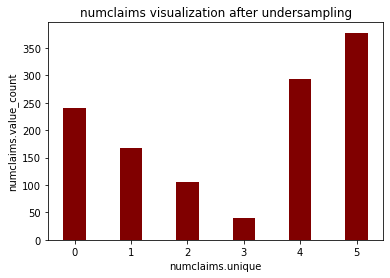

In [42]:
numclaims_unique = x_train_balanced ['numclaims'].unique() #define x axis
numclaims_values =x_train_balanced ['numclaims'].value_counts() # define y axis

plt.bar(numclaims_train , numclaims_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("numclaims.unique")
plt.ylabel("numclaims.value_count")
plt.title("numclaims visualization after undersampling")
plt.show()

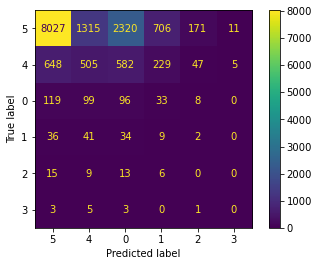

In [43]:
x_train_balanced
x_train = x_train_balanced.drop(['numclaims', 'claimcst0'], axis = 1)
y_train = x_train_balanced.numclaims

x_test1 = x_test.drop(['numclaims', 'claimcst0'], axis = 1)
y_test1 = x_test.numclaims

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test1)

knn = KNeighborsClassifier(n_neighbors = 5) #initialize a model with 5 neighbors
knn.fit(x_train_scaled, y_train) # fit the model in the train dataset
predictions = knn.predict(x_test_scaled) 

labels = list(y_test1.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test1, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [44]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
f1_score(predictions, y_test1, average = 'weighted'), "f1_score"

(0.4852259720234541, 'f1_score')

## Oversampling

In [45]:
#Define x and y, training and test datasets
x = auto_train
x_train, x_test = train_test_split(x, test_size = .25, random_state = 4)

# Oversample numclaims_1 randomly by selecting 1% of the rows randomly
numclaims_1 = x_train[x_train['numclaims'] == 1]
numclaims_1_over = numclaims_1.sample(round(4*len(numclaims_1)), replace = True)
numclaims_1_over.shape

# Oversample numclaims_2 randomly by selecting 4% of the rows randomly
numclaims_2 = x_train[x_train['numclaims'] == 2]
numclaims_2_over = numclaims_2.sample(round(20*len(numclaims_2)), replace = True)
numclaims_2_over.shape

# Oversample numclaims_3 randomly by selecting 50% of the rows randomly
numclaims_3 = x_train[x_train['numclaims'] == 3]
numclaims_3_over = numclaims_3.sample(round(60*len(numclaims_3)), replace = True)
numclaims_3_over.shape

# Oversample numclaims_4 randomly by selecting 50% of the rows randomly
numclaims_4 = x_train[x_train['numclaims'] == 4]
numclaims_4_over = numclaims_4.sample(round(60*len(numclaims_4)), replace = True)
numclaims_4_over.shape

# Oversample numclaims_5 randomly by adding 100x of the rows randomly
numclaims_5 = x_train[x_train['numclaims'] == 5]
numclaims_5_over = numclaims_5.sample(round(100*len(numclaims_5)), replace = True)
numclaims_5_over.shape

# Remove the rows that correspond to numclaims1, 2, 3, 4, 5 in the training dataset
x_train = x_train[x_train.numclaims != 1]
x_train = x_train[x_train.numclaims != 2]
x_train = x_train[x_train.numclaims != 3]
x_train = x_train[x_train.numclaims != 4]
x_train = x_train[x_train.numclaims != 5]

# Add the oversample class 1 and class 2 to the X_train to create a new dataset called X_train_balanced.
x_train_balanced = x_train.append([numclaims_1_over, numclaims_2_over, numclaims_3_over, numclaims_4_over, numclaims_5_over])
x_train_balanced['numclaims'].value_counts()

0    37812
1    24072
3    20220
2    19620
4     6360
5     4000
Name: numclaims, dtype: int64

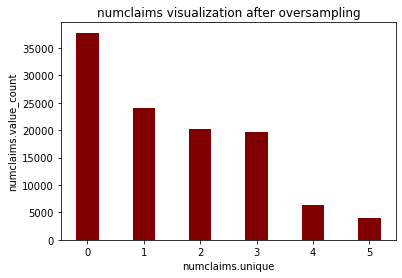

In [46]:
numclaims_unique = x_train_balanced ['numclaims'].unique() #define x axis
numclaims_values =x_train_balanced ['numclaims'].value_counts() # define y axis

plt.bar(numclaims_unique , numclaims_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("numclaims.unique")
plt.ylabel("numclaims.value_count")
plt.title("numclaims visualization after oversampling")
plt.show()

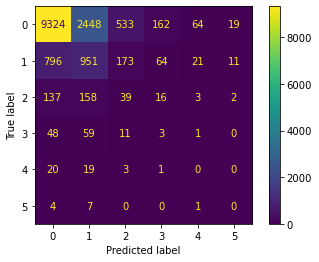

In [47]:
x_train_balanced
x_train = x_train_balanced.drop(['numclaims', 'claimcst0'], axis = 1)
y_train = x_train_balanced.numclaims

x_test1 = x_test.drop(['numclaims', 'claimcst0'], axis = 1)
y_test1= x_test.numclaims

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test1)

knn = KNeighborsClassifier(n_neighbors = 5) #initialize a model with 5 neighbors
knn.fit(x_train_scaled, y_train) # fit the model in the train dataset
predictions = knn.predict(x_test_scaled) 

labels = list(y_test1.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test1, predictions) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [48]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
f1_score(predictions, y_test1, average = 'weighted'), "f1_score"

(0.6424902406231922, 'f1_score')

## SMOTE

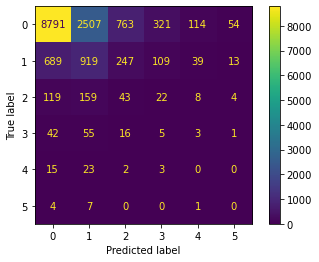

In [49]:
#Define x and y, training and test datasets
x = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y1 = auto_train.numclaims

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = .25, random_state = 4)

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to training data data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define SMOTE function with a fixed random state of 42
sm = SMOTE(random_state=42, k_neighbors = 5)

# New X and Y dataset
x_train_scaled_SMOTE, y_train_SMOTE = sm.fit_resample(x_train_scaled, y_train)


knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(x_train_scaled_SMOTE, y_train_SMOTE)
y_pred_knn_SMOTE = knn.predict(x_test_scaled)

labels = list(y_test.unique()) # labels for confusion matrix
cm = confusion_matrix(y_test, y_pred_knn_SMOTE) #confusion matrix
pd.DataFrame(cm, index = labels, columns = labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numclaims_unique)
disp.plot()
plt.show()

In [50]:
# Computing accuracy score i.e. total correct predictions divided by total number of observations
f1_score(y_pred_knn_SMOTE, y_test, average = 'weighted'), "f1_score"

(0.5898743788145747, 'f1_score')

## Hyperparameter Tuning

In [60]:
auto_train_sample = auto_train.sample(frac=0.01) #sample data to reduce running time
x = auto_train_sample.drop(['numclaims', 'claimcst0'], axis = 1)
y = auto_train_sample.claimcst0

# create a training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 4)

# Define parameters to search through
weights = ["uniform", "distance"]
algorithm = ["auto","ball_tree","kd_tree", "brute"]
n_neighbors = range(1,10)
p = range(1,5)

# storing our numeric results
results = []

# forloop to get every possible combination of criterion, splitter, and min_sample_leafs
for weight, alg, n_neigh, p in itertools.product(weights, algorithm, n_neighbors, p):

    # Initialize a decision tree regression model with specific parameters
    knn_reg = KNeighborsRegressor(weights = weight,
                               algorithm = alg,
                               n_neighbors = n_neigh,
                                 p = p)
    # Train the decision tree regressor
    knn_reg = knn_reg.fit(x_train,y_train)
    # Get prediction from decision tree regressor
    y_pred = knn_reg.predict(x_test)
    # Calculate the mean absolute error metric
    mae = mean_absolute_error(y_test, y_pred)
    # Append to results to store mae
    results.append(mae)
    

In [61]:
# Create dataframe to view results easily
df_results_knn_reg = pd.DataFrame(itertools.product(weights, algorithm, n_neighbors,range(1,5)),
                              columns = ['weights', 'algorithm', 'k', "p"])

# Create a mse column
df_results_knn_reg['mae'] = results
# Uncomment line below to remove scientific notation in data frame
df_results_knn_reg['mae'] = df_results_knn_reg['mae'].astype('int64')
df_results_knn_reg
# Sort values
df_results_knn_reg.sort_values('mae')

,weights,algorithm,k,p,mae
29,uniform,auto,8,2,488
137,uniform,brute,8,2,488
101,uniform,kd_tree,8,2,488
65,uniform,ball_tree,8,2,488
100,uniform,kd_tree,8,1,491
...,...,...,...,...,...
109,uniform,brute,1,2,904
217,distance,kd_tree,1,2,904
73,uniform,kd_tree,1,2,904
37,uniform,ball_tree,1,2,904


## MODEL COMPARISON

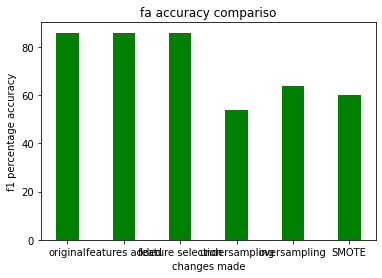

In [53]:
f1_model = ['original', 'features added', 'feature selection', 'undersampling', 'oversampling', 'SMOTE'] #define x axis
f1_values = [86, 86, 86, 54, 64, 60] # define y axis

plt.bar(f1_model , f1_values, color ='green', 
        width = 0.4)
plt.xlabel("changes made")
plt.ylabel("f1 percentage accuracy")
plt.title("fa accuracy comparison")
plt.show()

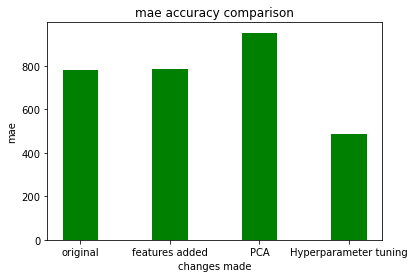

In [62]:
f1_model = ['original', 'features added', 'PCA', 'Hyperparameter tuning'] #define x axis
f1_values = [781, 787, 952, 488] # define y axis

plt.bar(f1_model , f1_values, color ='green', 
        width = 0.4)
plt.xlabel("changes made")
plt.ylabel("mae")
plt.title("mae accuracy comparison")
plt.show()

## Use the best algorithm combination and metric to predict auto_test

# Predict numclaim using the KNN - Independent Test Set on the original dataset

In [106]:
auto_predictions = pd.read_csv("C:/Users/Hp/Desktop/MSC 550/auto_potential_customers_2022.csv")

In [108]:
#Define x and y, training and test datasets
x_train = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y1_train = auto_train.numclaims

x_test = auto_test

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y1_train) # fit the algorithim in the dataset
numclaims_predictions = knn.predict(x_test) # use x to predict y after fitting the data

auto_predictions['numclaims'] = numclaims_predictions
auto_predictions

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100,0
1,16732441,M,2.0,10/4/1984,567.0,F,NaN,3,STNWG,2.079,0
2,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354,1
3,30875047,F,3.0,5/17/1973,807.0,E,NaN,4,UTE,1.969,0
4,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969,0
...,...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,1/7/1966,690.0,D,71.4,4,STNWG,1.056,0
7460,73906733,M,5.0,5/25/1958,558.0,C,142.5,1,STNWG,4.521,0
7461,45407372,F,4.0,9/2/1966,527.0,A,62.7,1,STNWG,3.102,0
7462,41423165,M,5.0,8/9/1958,817.0,B,129.0,4,SEDAN,0.803,0


## Predict claim cost

In [109]:
#Define x and y, training and test datasets
x_train = auto_train.drop(['numclaims', 'claimcst0'], axis = 1)
y2_train = auto_train.claimcst0

x_test = auto_test
y2_test = []

# storing our numeric results
results = []

# Initialize a decision tree regression model with specific parameters
knn_reg = KNeighborsRegressor(weights = 'uniform',algorithm = 'auto',n_neighbors = 8,p = 2)
# Train the decision tree regressor
knn_reg = knn_reg.fit(x_train,y2_train)
# Get prediction from decision tree regressor
y_pred = knn_reg.predict(x_test)


auto_predictions['claimcst0'] = y_pred
auto_predictions

,quote_number,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0
0,29323463,F,4.0,4/14/1968,750.0,C,124.5,2,HBACK,1.100,0,17.944455
1,16732441,M,2.0,10/4/1984,567.0,F,NaN,3,STNWG,2.079,0,1357.150976
2,68744228,M,4.0,11/30/1962,378.0,D,111.4,3,HDTOP,2.354,1,5426.584291
3,30875047,F,3.0,5/17/1973,807.0,E,NaN,4,UTE,1.969,0,0.000000
4,37049210,M,6.0,10/2/1945,844.0,C,111.0,1,HBACK,1.969,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7459,95907219,F,4.0,1/7/1966,690.0,D,71.4,4,STNWG,1.056,0,0.000000
7460,73906733,M,5.0,5/25/1958,558.0,C,142.5,1,STNWG,4.521,0,252.135516
7461,45407372,F,4.0,9/2/1966,527.0,A,62.7,1,STNWG,3.102,0,143.535621
7462,41423165,M,5.0,8/9/1958,817.0,B,129.0,4,SEDAN,0.803,0,0.000000


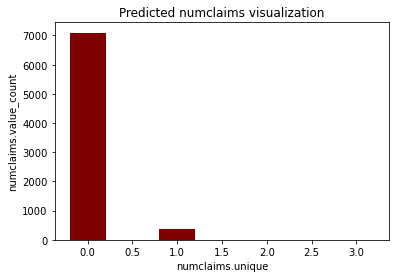

In [112]:
numclaims_unique = auto_predictions['numclaims'].unique() #define x axis
numclaims_values =auto_predictions['numclaims'].value_counts() # define y axis

plt.bar(numclaims_unique , numclaims_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("numclaims.unique")
plt.ylabel("numclaims.value_count")
plt.title("Predicted numclaims visualization")
plt.show()

In [116]:
auto_predictions['claimcst0'].describe()

count     7464.000000
mean       516.939258
std       1322.385032
min          0.000000
25%          0.000000
50%         47.493297
75%        333.057423
max      15684.985725
Name: claimcst0, dtype: float64

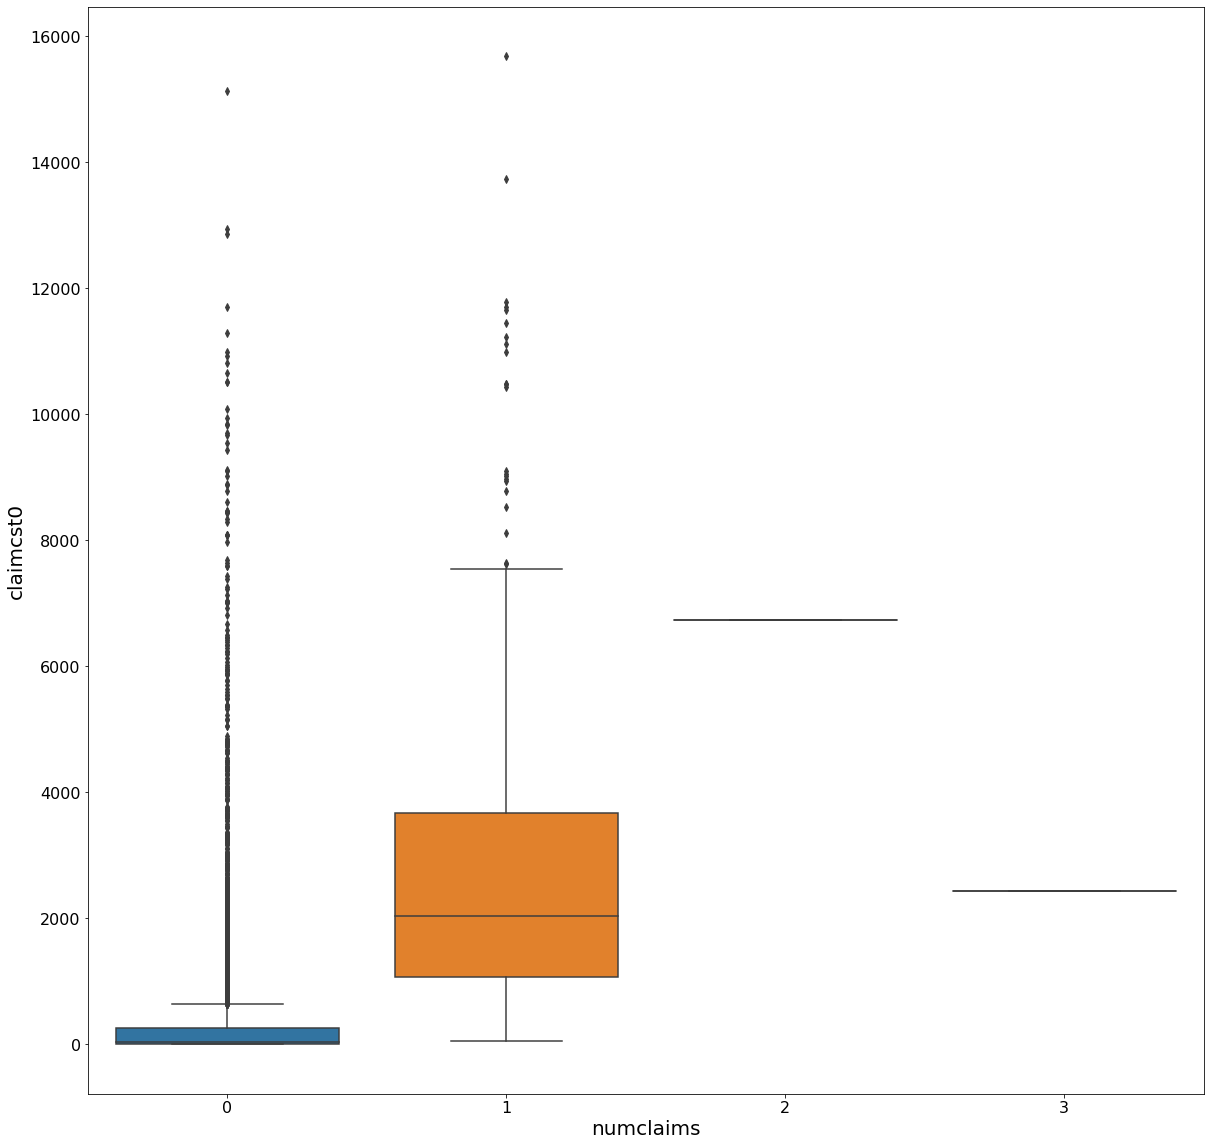

In [124]:
ig, axes = plt.subplots(1, 1, figsize = (20,20)) # Create grid of subplots using Seaborn

ax = sns.boxplot(data = auto_predictions, x = "numclaims", y = "claimcst0") # Define first plot
ax.set_xlabel('numclaims', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel("claimcst0", fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger

In [126]:
auto_predictions.to_csv('C:/Users/Hp/Desktop/MSC 550/auto_potential_customers_final_2022.csv',  index = False) # download csv file